<a href="https://colab.research.google.com/github/david-j-cox/Man-vs-Machine/blob/master/GME_Fit_Analyses_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Packages!!
import os
import sys
import pandas as pd
import numpy as np
import scipy
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
upload = files.upload()
# Read in the data
all_fits = pd.read_csv('all_fits.csv')

Saving all_fits.csv to all_fits.csv


In [ ]:
all_fits

,Unnamed: 0,person_num,reinforcer,fit_type,est_k,est_re,vac,city
0,0,3bb3b1bd48,citations,overall,6.394477,1.000000,-0.5598,Pittsburgh
1,1,3bb3b1bd48,citations,black,1.032873,1.000000,-0.4828,Pittsburgh
2,2,3bb3b1bd48,citations,white,10.328731,1.000000,0.2479,Pittsburgh
3,3,b62aedb5bb,citations,overall,260183.412663,61738.400697,-1.0190,Pittsburgh
4,4,b62aedb5bb,citations,black,0.133840,0.023481,-0.0609,Pittsburgh
...,...,...,...,...,...,...,...,...
384588,384588,00fd1ebe22,arrests,overall,1.000000,1.000000,-3.2000,Nashville
384589,384589,00fd1ebe22,arrests,black,1.000000,1.000000,-1.0000,Nashville
384590,384590,00fd1ebe22,arrests,other,1.000000,1.000000,-0.3333,Nashville
384591,384591,00fd1ebe22,arrests,white,1.000000,1.000000,-0.5814,Nashville


In [ ]:
#%% Info for each specific reinforcer
cite_fits = all_fits[(all_fits['reinforcer']=='citations')]
search_fits = all_fits[(all_fits['reinforcer']=='searches')]
frisk_fits = all_fits[(all_fits['reinforcer']=='frisks')]
contra_fits = all_fits[(all_fits['reinforcer']=='contraband')]
arrest_fits = all_fits[(all_fits['reinforcer']=='arrests')]

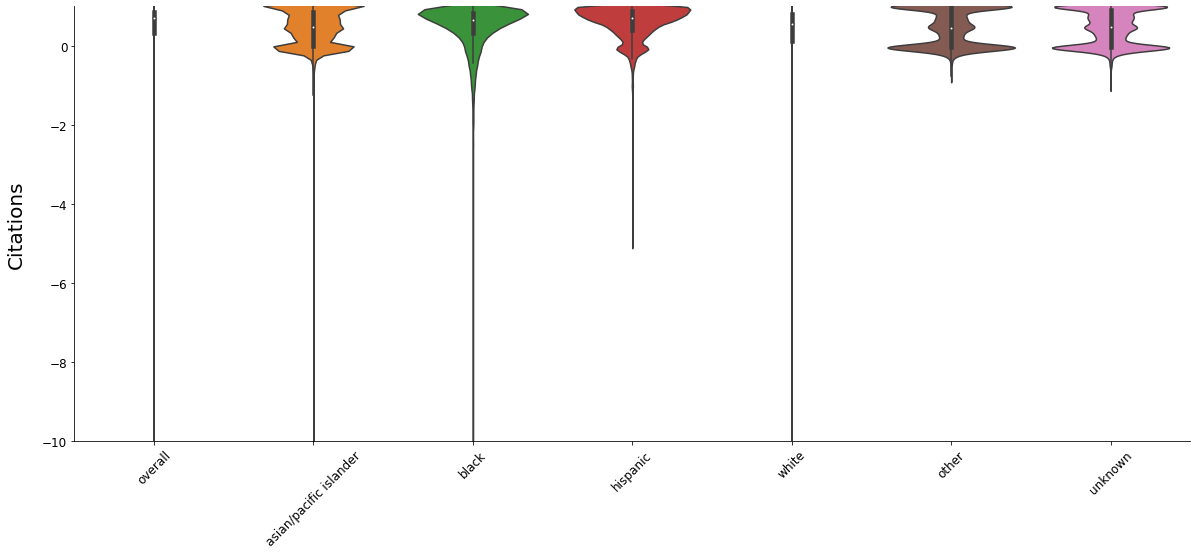

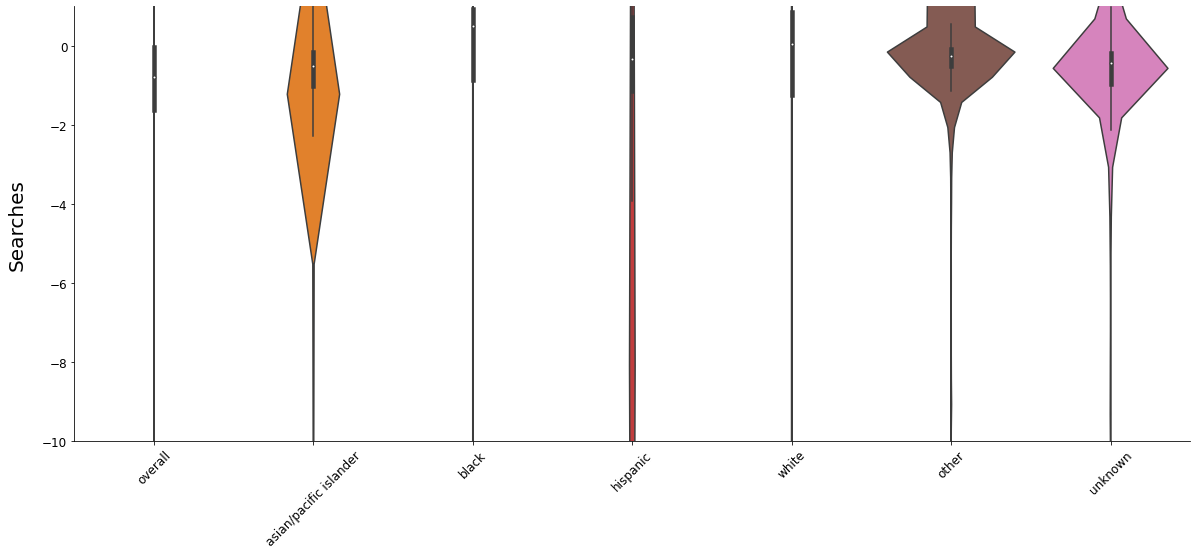

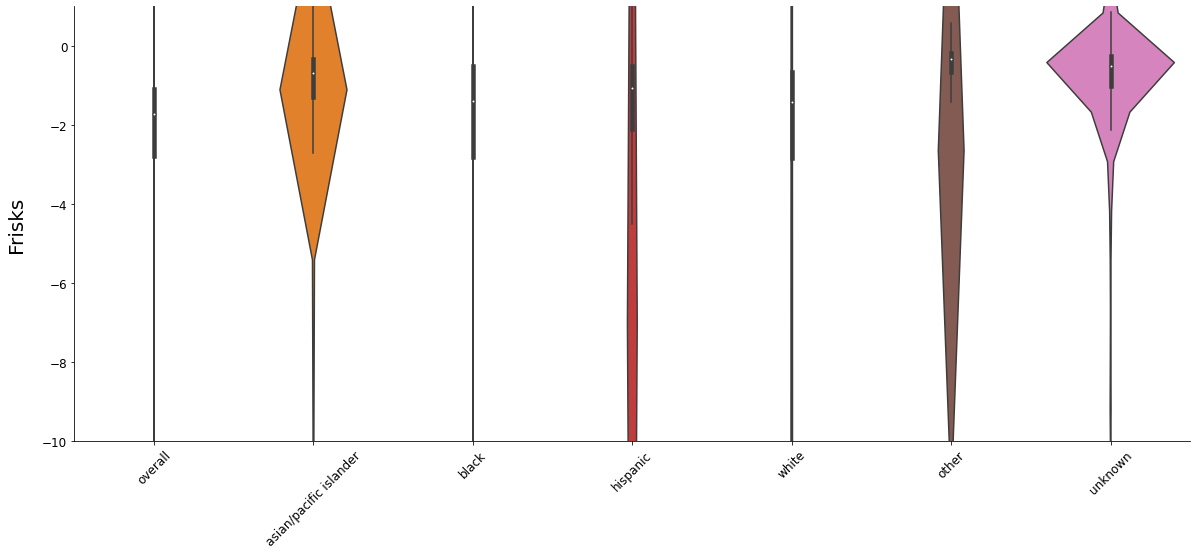

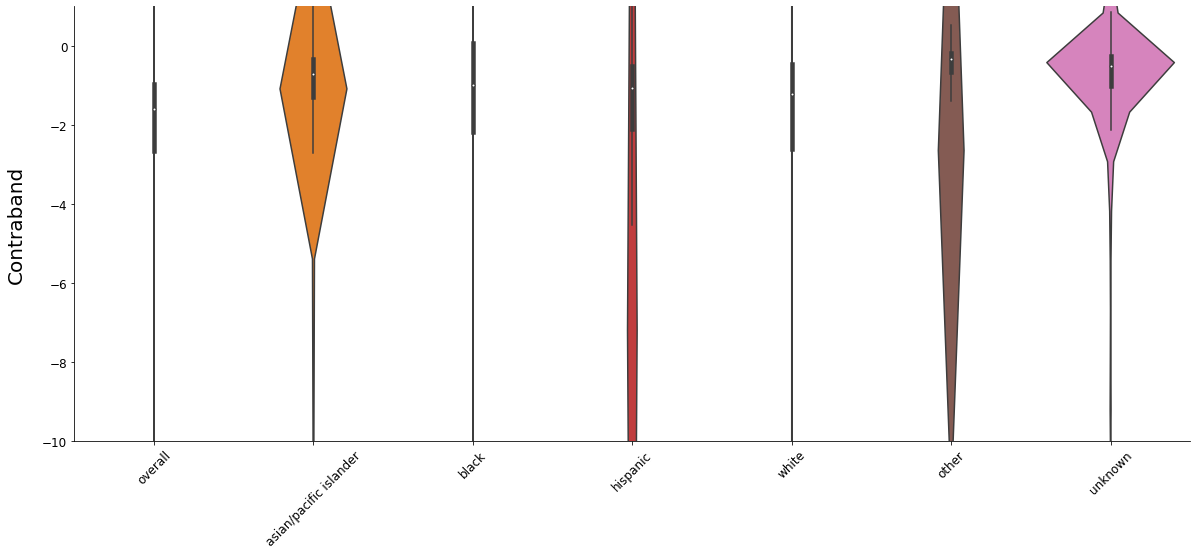

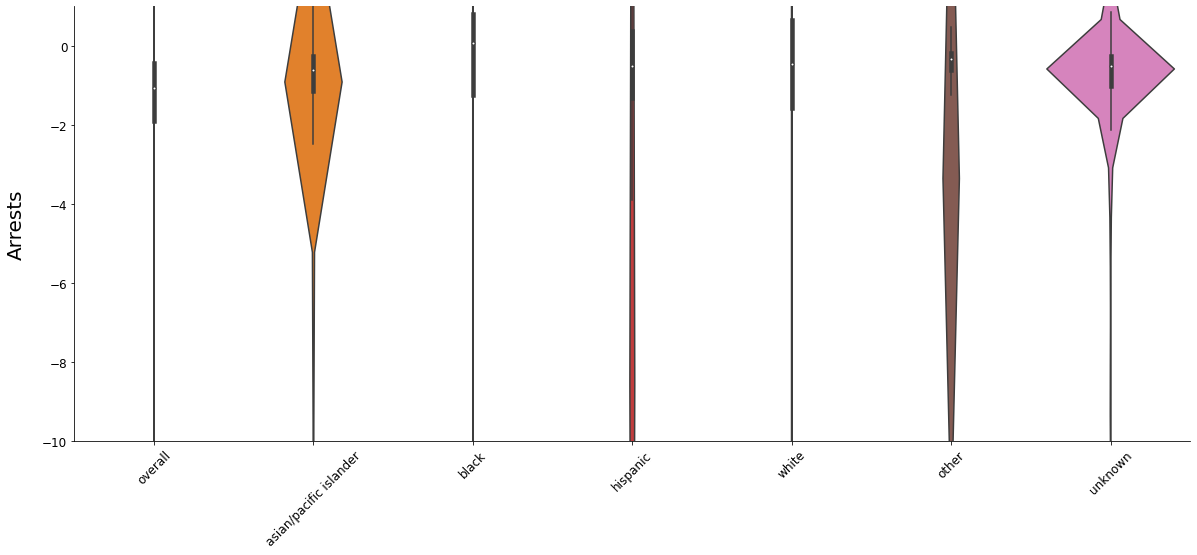

In [ ]:
#%% Violin plots of fit distributions
def violin(df, y_label):
  f, ax = plt.subplots(figsize=(20, 8))
  sns.violinplot(x='fit_type', y='vac', data=df, order=['overall', 'asian/pacific islander', 'black', 'hispanic', 
                                                        'white', 'other', 'unknown'])
  plt.xlabel('', fontsize=20, labelpad=(16))
  plt.ylabel(y_label, fontsize=20, labelpad=(16))
  plt.ylim(-10, 1)
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=12, rotation=45)
  right_side = ax.spines["right"]
  right_side.set_visible(False)
  top = ax.spines["top"]
  top.set_visible(False)
  plt.show()

violin(cite_fits, 'Citations')
violin(search_fits, 'Searches')
violin(frisk_fits, 'Frisks')
violin(contra_fits, 'Contraband')
violin(arrest_fits, 'Arrests')

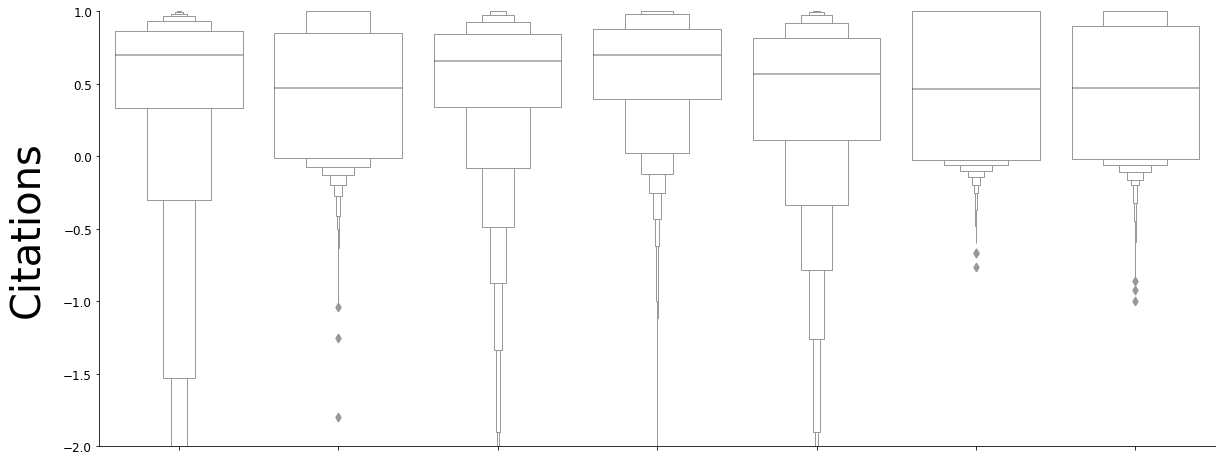

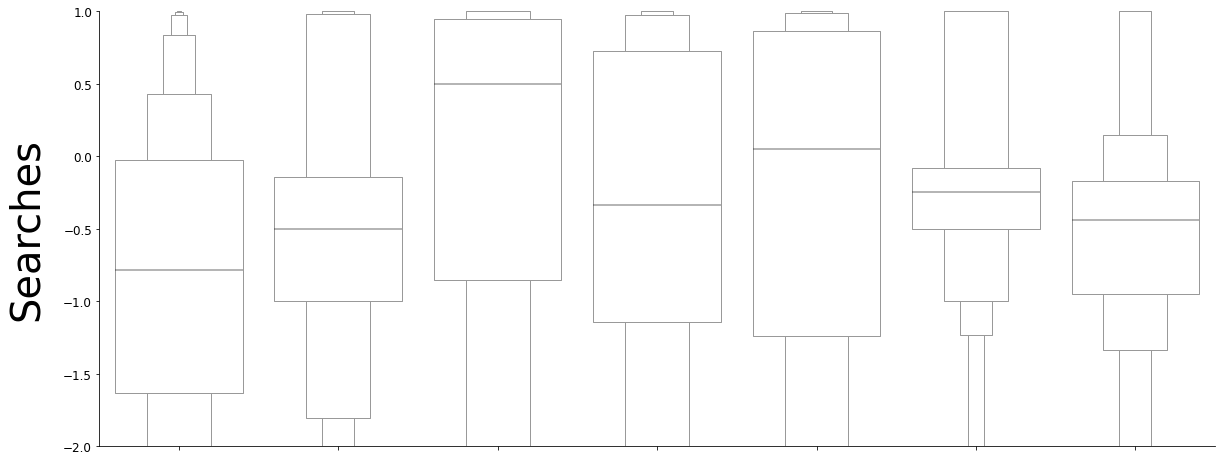

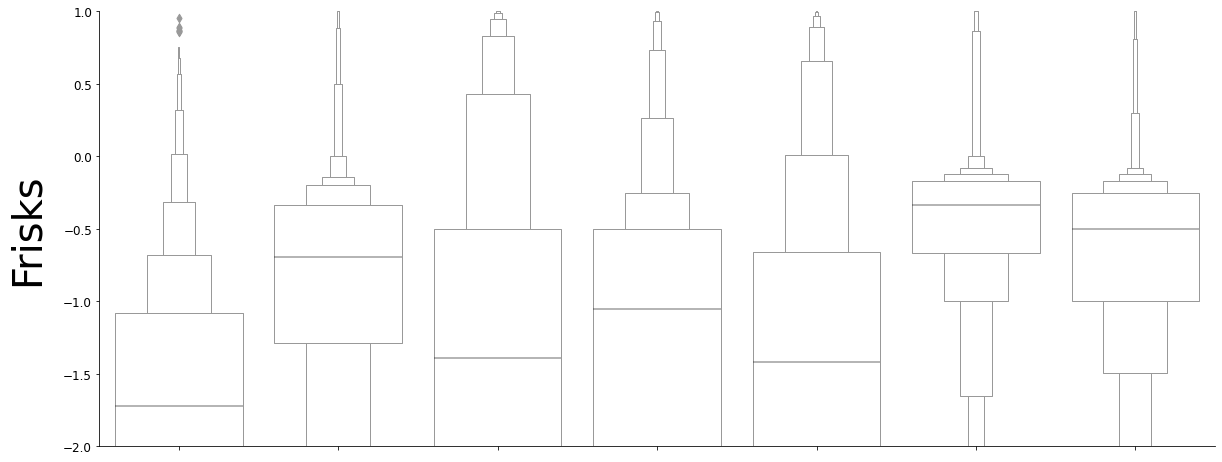

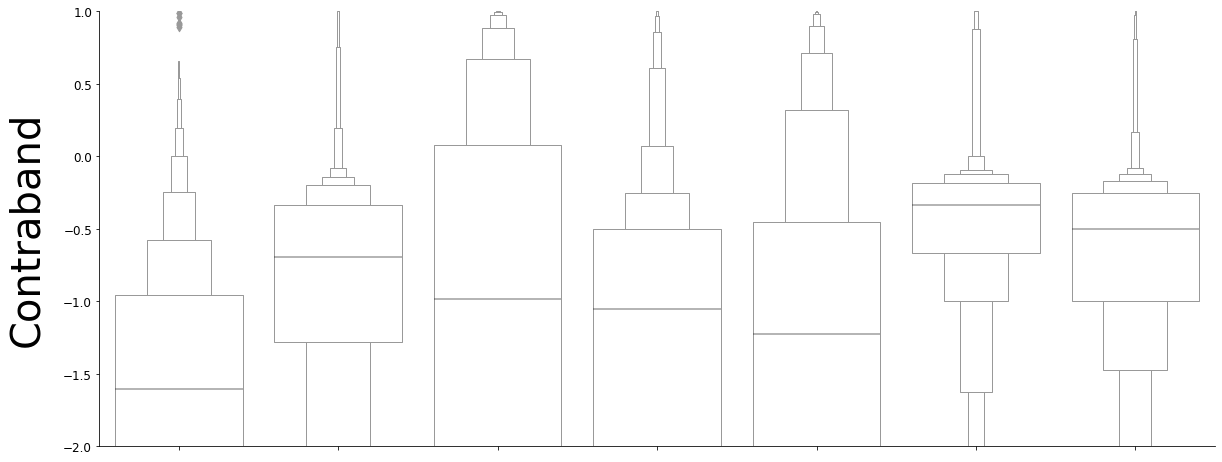

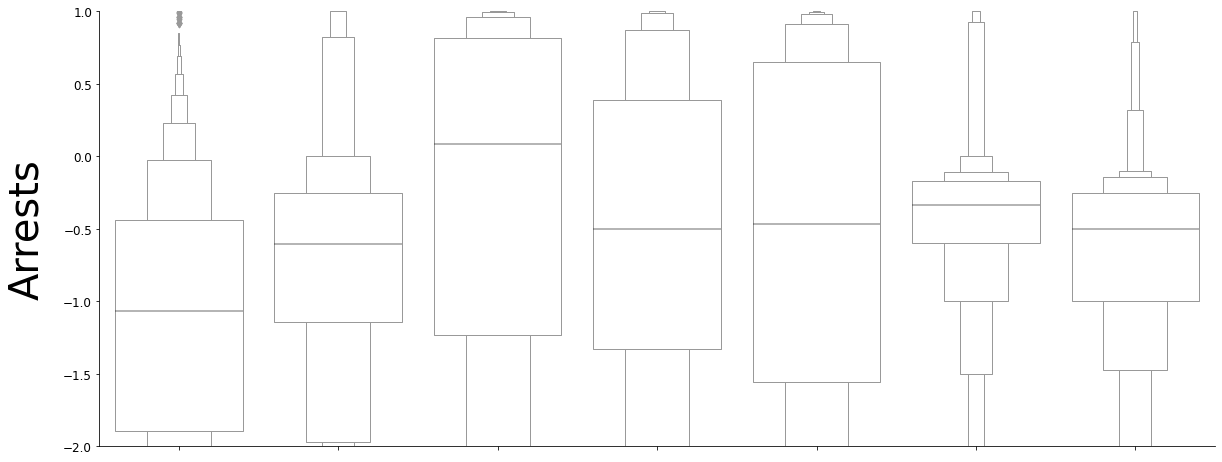

In [ ]:

#%% Try boxen here
def boxen(df, y_label):
  f, ax = plt.subplots(figsize=(20, 8))
  sns.boxenplot(x='fit_type', y='vac', data=df, color='white', order=['overall', 'asian/pacific islander', 'black', 
                                                                      'hispanic', 'white', 'other', 'unknown'])
  plt.xlabel('', fontsize=20, labelpad=(16))
  plt.xticks(fontsize=1, color='white')
  plt.ylabel(y_label, fontsize=40, labelpad=(16))
  plt.ylim(-2, 1)
  plt.yticks(fontsize=12)
  right_side = ax.spines["right"]
  right_side.set_visible(False)
  top = ax.spines["top"]
  top.set_visible(False)
  plt.show()
  
boxen(cite_fits, 'Citations')
boxen(search_fits, 'Searches')
boxen(frisk_fits, 'Frisks')
boxen(contra_fits, 'Contraband')
boxen(arrest_fits, 'Arrests')

In [ ]:
#%% Some unique hash ids were generated across multiple departments. Create unique id using city and hash id
all_fits['unique_id'] = all_fits['person_num'] + "_" + all_fits['city']
all_fits.head(20)

,Unnamed: 0,person_num,reinforcer,fit_type,est_k,est_re,vac,city,unique_id
0,0,3bb3b1bd48,citations,overall,6.394477,1.000000,-0.5598,Pittsburgh,3bb3b1bd48_Pittsburgh
1,1,3bb3b1bd48,citations,black,1.032873,1.000000,-0.4828,Pittsburgh,3bb3b1bd48_Pittsburgh
2,2,3bb3b1bd48,citations,white,10.328731,1.000000,0.2479,Pittsburgh,3bb3b1bd48_Pittsburgh
3,3,b62aedb5bb,citations,overall,260183.412663,61738.400697,-1.0190,Pittsburgh,b62aedb5bb_Pittsburgh
4,4,b62aedb5bb,citations,black,0.133840,0.023481,-0.0609,Pittsburgh,b62aedb5bb_Pittsburgh
5,5,b62aedb5bb,citations,other,1.000000,1.000000,-0.0882,Pittsburgh,b62aedb5bb_Pittsburgh
6,6,b62aedb5bb,citations,unknown,1.000000,1.000000,-0.0278,Pittsburgh,b62aedb5bb_Pittsburgh
7,7,b62aedb5bb,citations,white,6.352992,2.508268,-1.0487,Pittsburgh,b62aedb5bb_Pittsburgh
8,8,1ccb6bd45a,citations,overall,1.000000,1.000000,-2.0000,Pittsburgh,1ccb6bd45a_Pittsburgh
9,9,1ccb6bd45a,citations,black,1.000000,1.000000,-0.5714,Pittsburgh,1ccb6bd45a_Pittsburgh


In [ ]:
#%% Info for each specific reinforcer
cite_fits = all_fits[(all_fits['reinforcer']=='citations')]
search_fits = all_fits[(all_fits['reinforcer']=='searches')]
frisk_fits = all_fits[(all_fits['reinforcer']=='frisks')]
contra_fits = all_fits[(all_fits['reinforcer']=='contraband')]
arrest_fits = all_fits[(all_fits['reinforcer']=='arrests')]

In [ ]:
#%% Separate out the different dfs for different events
ninety_fit = all_fits[(all_fits['vac']>=0.90)]
print(len(ninety_fit.unique_id.unique()))
print(len(ninety_fit.unique_id.unique())/(72594))
eighty_fit = all_fits[(all_fits['vac']>=0.80)]
print(len(eighty_fit.unique_id.unique()))
print(len(eighty_fit.unique_id.unique())/(72594))

8141
0.11214425434608921
9465
0.13038267625423589


In [ ]:
ninety_fit.groupby(by=['fit_type', 'reinforcer']).count()

person_num  est_k  ...  city  unique_id
fit_type               reinforcer                     ...                 
asian/pacific islander arrests            563    563  ...   563        563
                       citations         3292   3292  ...  3292       3292
                       contraband          53     53  ...    53         53
                       frisks              69     69  ...    69         69
                       searches          1178   1178  ...  1178       1178
black                  arrests           2513   2513  ...  2513       2513
                       citations         3324   3324  ...  3324       3324
                       contraband         652    652  ...   652        652
                       frisks             516    516  ...   516        516
                       searches          3399   3399  ...  3399       3399
hispanic               arrests           1394   1394  ...  1394       1394
                       citations         4006   4006  ...  4006       4006
                       contraband         133    133  ...   133        133
                       frisks             193    193  ...   193        193
                       searches          1845   1845  ...  1845       1845
other                  arrests            176    176  ...   176        176
                       citations         1954   1954  ...  1954       1954
                       contraband          64     64  ...    64         64
                       frisks              64     64  ...    64         64
                       searches           853    853  ...   853        853
overall                arrests             12     12  ...    12         12
                       citations         3964   3964  ...  3964       3964
                       contraband           6      6  ...     6          6
                       frisks               1      1  ...     1          1
                       searches           687    687  ...   687        687
unknown                arrests            100    100  ...   100        100
                       citations         2576   2576  ...  2576       2576
                       contraband          36     36  ...    36         36
                       frisks              43     43  ...    43         43
                       searches           542    542  ...   542        542
white                  arrests           1797   1797  ...  1797       1797
                       citations         3098   3098  ...  3098       3098
                       contraband         358    358  ...   358        358
                       frisks             343    343  ...   343        343
                       searches          2609   2609  ...  2609       2609

[35 rows x 6 columns]

In [ ]:
eighty_fit.groupby(by=['fit_type', 'reinforcer']).count()

Unnamed: 0  person_num  ...  city  unique_id
fit_type               reinforcer                          ...                 
asian/pacific islander arrests            684         684  ...   684        684
                       citations         4190        4190  ...  4190       4190
                       contraband          64          64  ...    64         64
                       frisks              92          92  ...    92         92
                       searches          1312        1312  ...  1312       1312
black                  arrests           3449        3449  ...  3449       3449
                       citations         6416        6416  ...  6416       6416
                       contraband         991         991  ...   991        991
                       frisks             795         795  ...   795        795
                       searches          4216        4216  ...  4216       4216
hispanic               arrests           1866        1866  ...  1866       1866
                       citations         6670        6670  ...  6670       6670
                       contraband         203         203  ...   203        203
                       frisks             272         272  ...   272        272
                       searches          2326        2326  ...  2326       2326
other                  arrests            194         194  ...   194        194
                       citations         2138        2138  ...  2138       2138
                       contraband          70          70  ...    70         70
                       frisks              75          75  ...    75         75
                       searches           874         874  ...   874        874
overall                arrests             46          46  ...    46         46
                       citations         7828        7828  ...  7828       7828
                       contraband          11          11  ...    11         11
                       frisks              15          15  ...    15         15
                       searches           827         827  ...   827        827
unknown                arrests            121         121  ...   121        121
                       citations         3076        3076  ...  3076       3076
                       contraband          52          52  ...    52         52
                       frisks              52          52  ...    52         52
                       searches           583         583  ...   583        583
white                  arrests           2521        2521  ...  2521       2521
                       citations         5448        5448  ...  5448       5448
                       contraband         537         537  ...   537        537
                       frisks             517         517  ...   517        517
                       searches          3277        3277  ...  3277       3277

[35 rows x 7 columns]

In [ ]:
cite_90 = cite_fits[cite_fits['vac']>=0.90]
print("Citations:", len(cite_90.unique_id.unique())/72594)
searches_90 = search_fits[search_fits['vac']>=0.90]
print("Searches:", len(searches_90.unique_id.unique())/72594)
frisks_90 = frisk_fits[frisk_fits['vac']>=0.90]
print("Frisks:", len(frisks_90.unique_id.unique())/72594)
contra_90 = contra_fits[contra_fits['vac']>=0.90]
print("Contraband:", len(contra_90.unique_id.unique())/72594)
arrest_90 = arrest_fits[arrest_fits['vac']>=0.90]
print("Arrests:", len(arrest_90.unique_id.unique())/72594)

Citations: 0.07006088657464804
Searches: 0.06424773397250462
Frisks: 0.012618122709865828
Contraband: 0.014904813069950685
Arrests: 0.04537565088023804


In [ ]:
val_counts = ninety_fit.drop_duplicates(['unique_id', 'reinforcer'])
val_counts = val_counts['unique_id'].value_counts()
xs = list(range(1, 6))
heights = val_counts.value_counts()
heights = heights.sort_index()

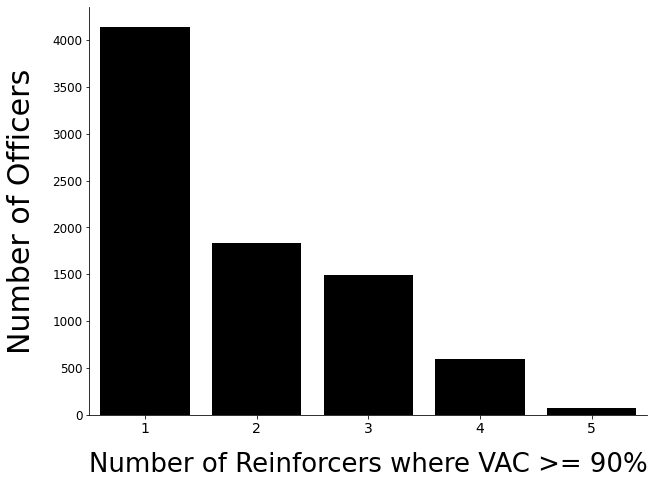

In [ ]:
fig, ax = plt.subplots(figsize=(10,7.5))
plt.bar(x=xs, height=heights, color='k')
plt.xlabel('Number of Reinforcers where VAC >= 90%', fontsize=26, labelpad=(16))
plt.xticks([1, 2, 3, 4, 5],fontsize=14)
plt.xlim(0.5, 5.5)
plt.ylabel('Number of Officers', fontsize=30, labelpad=(16))
plt.yticks(fontsize=12)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
plt.show()

In [ ]:
heights

1    4145
2    1834
3    1495
4     591
5      76
Name: unique_id, dtype: int64

In [ ]:
1834+1495+591+76

3996

In [ ]:
ninety_fit

,person_num,reinforcer,fit_type,est_k,est_re,vac,city,unique_id
19,736e5e660d,citations,unknown,1.001641,0.968768,1.0000,Pittsburgh,736e5e660d_Pittsburgh
33,02a4a87ca6,citations,other,1.032873,1.000000,1.0000,Pittsburgh,02a4a87ca6_Pittsburgh
49,3bdda141db,citations,asian/pacific islander,1.032873,1.000000,1.0000,Pittsburgh,3bdda141db_Pittsburgh
96,3c1be4d002,citations,asian/pacific islander,1.032873,1.000000,1.0000,Pittsburgh,3c1be4d002_Pittsburgh
105,228cd1ad7d,citations,unknown,2.065746,1.000000,1.0000,Pittsburgh,228cd1ad7d_Pittsburgh
...,...,...,...,...,...,...,...,...
384496,49a9fba2d5,arrests,white,29.250002,1.000000,0.9970,Nashville,49a9fba2d5_Nashville
384520,22550b5fea,arrests,hispanic,8.666667,1.000000,1.0000,Nashville,22550b5fea_Nashville
384526,ff31da399a,arrests,white,81.250005,1.000000,0.9788,Nashville,ff31da399a_Nashville
384530,1114174a3e,arrests,hispanic,9.750000,1.000000,0.9688,Nashville,1114174a3e_Nashville


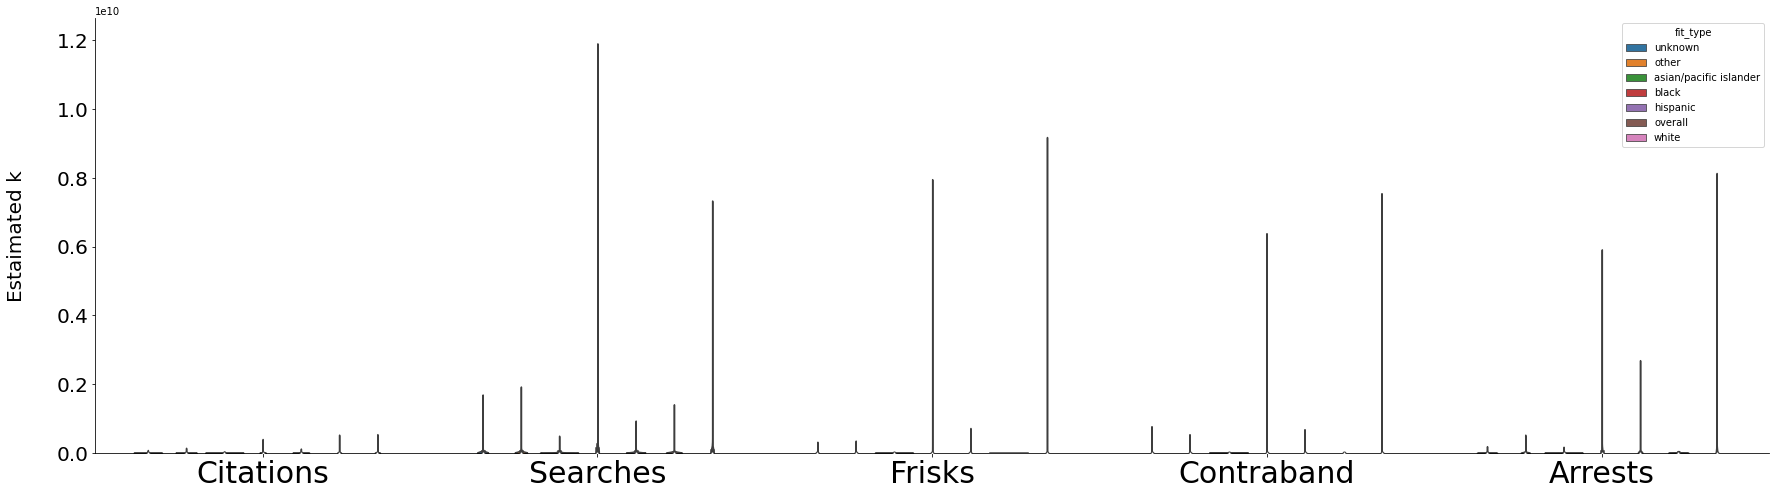

In [ ]:
#%% Violin plots of fit distributions
def violin_2(df, y_label, x_type, y_col, hue_col=None):
  f, ax = plt.subplots(figsize=(30, 8))
  sns.violinplot(x=x_type, y=y_col, data=df, hue=hue_col)
  plt.xlabel('', fontsize=20, labelpad=(16))
  plt.ylabel(y_label, fontsize=20, labelpad=(30))
  plt.ylim(0, )
  plt.yticks(fontsize=20)
  plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Citations', 'Searches', 'Frisks', 'Contraband', 'Arrests'], fontsize=30)
  right_side = ax.spines["right"]
  right_side.set_visible(False)
  top = ax.spines["top"]
  top.set_visible(False)
  plt.show()

violin_2(df=ninety_fit, y_label='Estaimated k', x_type='reinforcer', y_col='est_k', hue_col='fit_type')

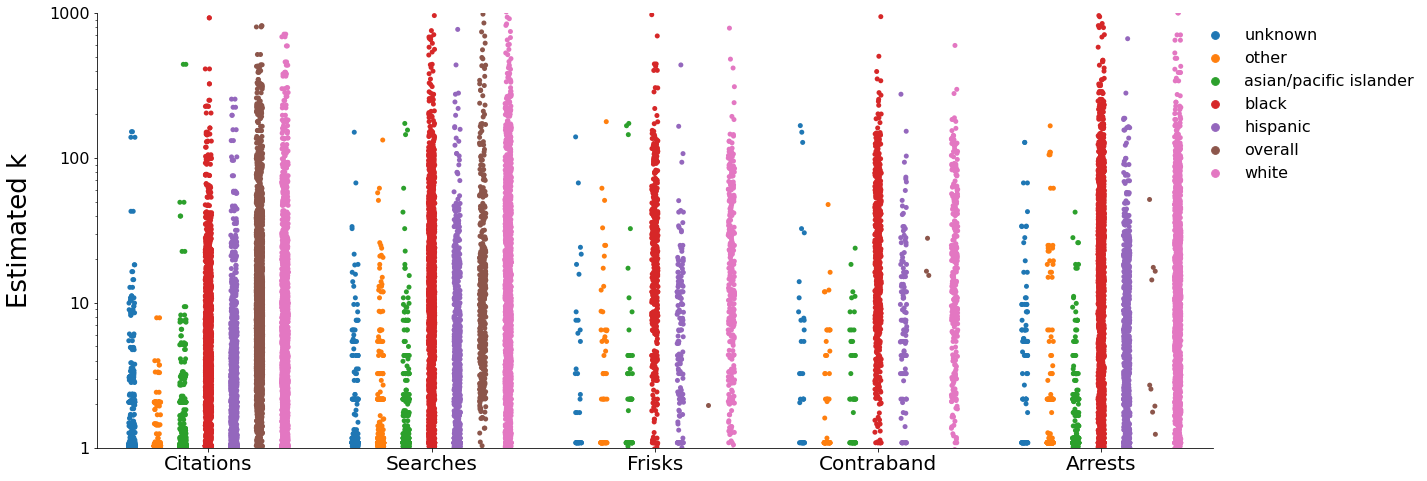

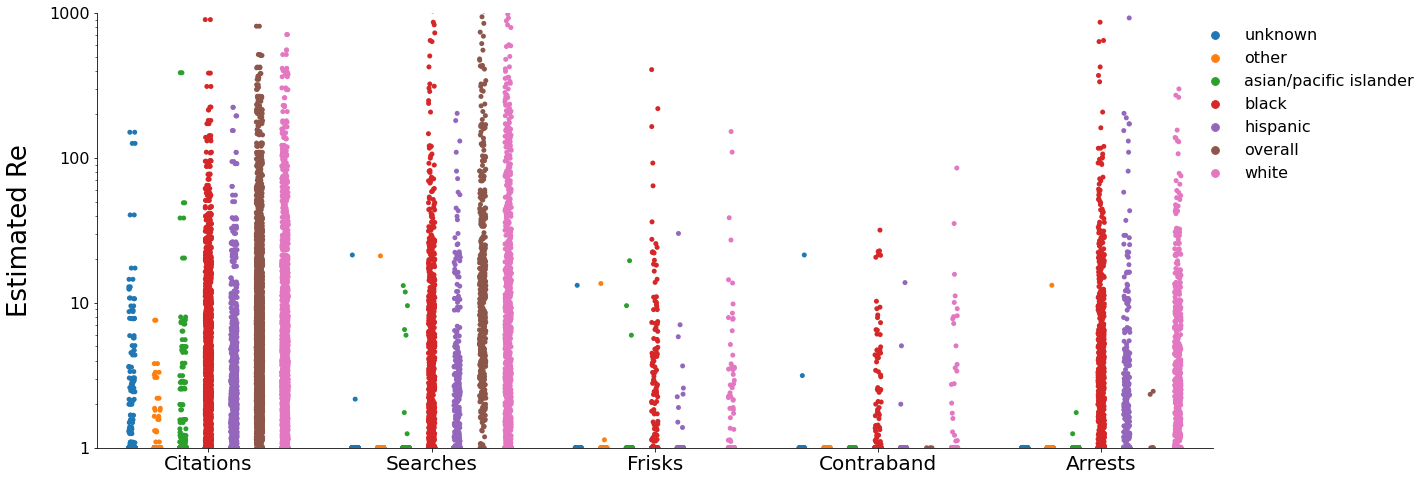

In [ ]:
#%% Violin plots of fit distributions
def boxen_2(df, y_label, x_type, y_col, hue_col=None):
  f, ax = plt.subplots(figsize=(20, 8))
  sns.stripplot(x=x_type, y=y_col, data=df, hue=hue_col, dodge=True)
  plt.xlabel('', fontsize=20, labelpad=(16))
  plt.ylabel(y_label, fontsize=26, labelpad=(16))
  plt.ylim(1, 1000)
  plt.yscale('log')
  plt.yticks(ticks=[1, 10, 100, 1000], labels=['1', '10', '100', '1000'], fontsize=16)
  plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Citations', 'Searches', 'Frisks', 'Contraband', 'Arrests'], fontsize=20)
  right_side = ax.spines["right"]
  right_side.set_visible(False)
  top = ax.spines["top"]
  top.set_visible(False)
  plt.legend(bbox_to_anchor=(0.975, 1), loc='upper left', ncol=1, fontsize=16, frameon=False)
  plt.show()

boxen_2(df=ninety_fit, y_label='Estimated k', x_type='reinforcer', y_col='est_k', hue_col='fit_type')
boxen_2(df=ninety_fit, y_label='Estimated Re', x_type='reinforcer', y_col='est_re', hue_col='fit_type')

33.333333333333336